In [27]:
from scipy.constants import pi, c, h, k
from math import e
import matplotlib.pyplot as plt
import numpy as np

#defining the prefactor of spectral energy density in SI units; Joules per metre cubed per Hertz

rho_0 = (8*pi*h)/(c**3) #value = 6.180644726185984e-58

#defining the constant in the exponent (h/k) in SI units: Kelvin per Hertz

d = h/k #value = 4.799243073366221e-11

#defining the spectral energy density function

def rho(T,v):
    return ((rho_0)*(v**3))*(1/((e**((d*v)/T))-1))


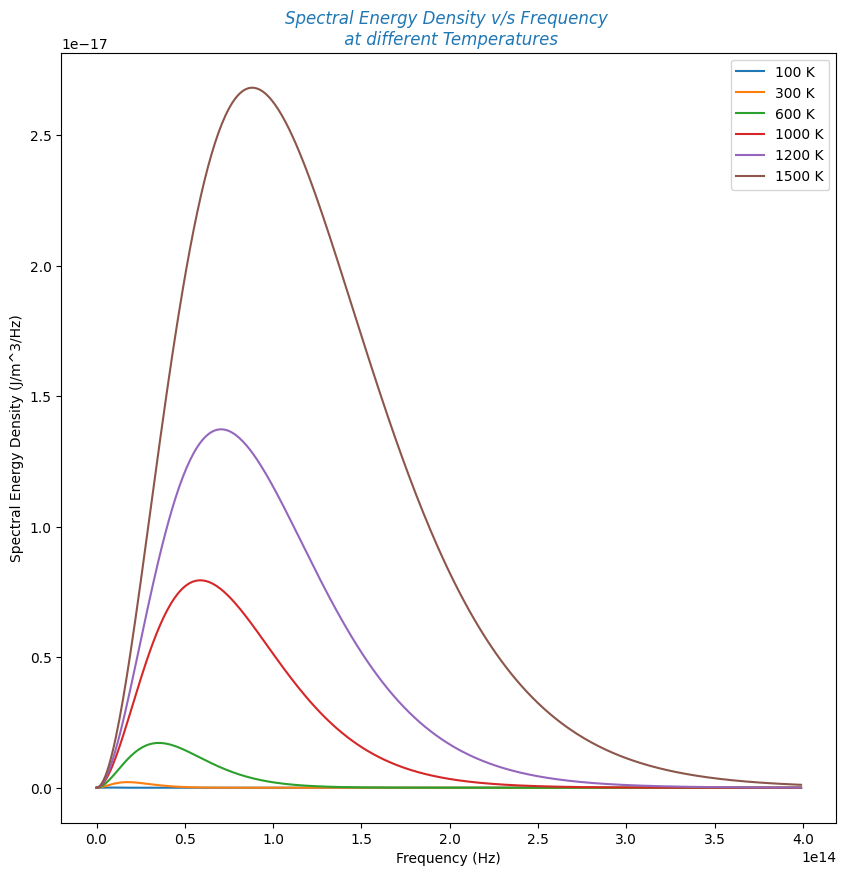

In [28]:
X = np.arange(1,4e14,0.01e14) #frequency points
T1 = 100; T2 = 300; T3 = 600; T4 = 1000; T5 = 1200; T6 = 1500 #according to assignment 1 Q4
T = [T1,T2,T3,T4,T5,T6] #storing the temp. values in a list

#plotting the spectral energy density at different temperatures

F = [] #will store the energy density values for each temp. (6 arrays)

for i in range(len(T)):
    f = rho(T[i],X)
    F.append(f.copy())

plt.figure(figsize=(10,10))

for i in range(len(T)): #adding each curve to the plot (6 in total)
    plt.plot(X,F[i])


plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Energy Density (J/m^3/Hz)")
plt.title(label="Spectral Energy Density v/s Frequency \n at different Temperatures",fontstyle="italic",color="tab:blue")
plt.legend(["100 K","300 K","600 K","1000 K","1200 K","1500 K"],loc="upper right")

plt.show()

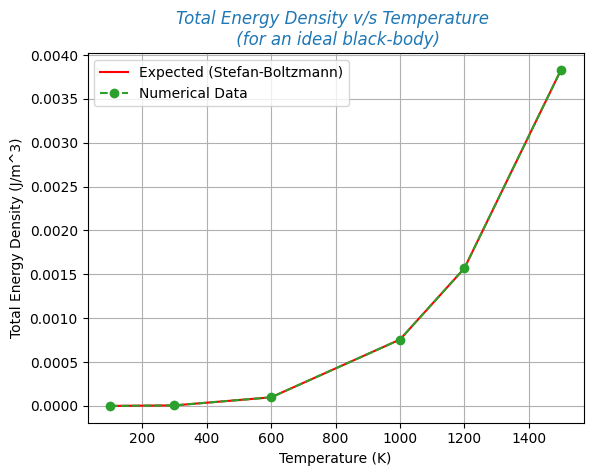

In [72]:
from scipy.integrate import quad #simple numerical integration

Tot_Dens = []

for i in range(len(T)):
    I, err = quad(lambda v: rho(T[i], v), 0.01, 1e15) #limits are good enough to match theory w/o compiler error
    Tot_Dens.append(I)

#comparing with Stefan-Boltzmann Law: u = aT^4

a = 7.565767e-16 #J/m^3/K^4

def u(T):
    return a*(T**4)

U = []

for i in range(len(T)):
    U.append(u(T[i]))

plt.plot(T,U,color="red")
plt.plot(T,Tot_Dens,marker='o',linestyle="dashed",color="tab:green")

plt.xlabel("Temperature (K)")
plt.ylabel("Total Energy Density (J/m^3)")
plt.legend(['Expected (Stefan-Boltzmann)','Numerical Data'])
plt.title(label="Total Energy Density v/s Temperature \n (for an ideal black-body)",fontstyle="italic",color="tab:blue")
plt.grid(True)

plt.show()


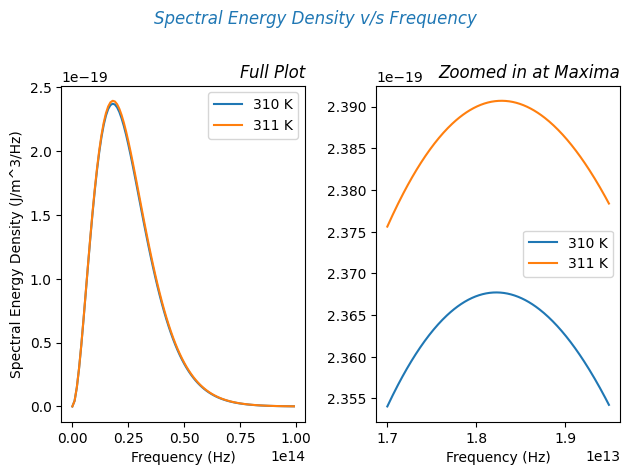

In [64]:
Tn = 310; Tf = 311 #according to Q5 (n-normal, f-fever)

Xa = np.arange(0.1e12,1e14,0.01e14)
Yna = rho(Tn,Xa); Yfa = rho(Tf,Xa)

plt.subplot(1,2,1)
plt.plot(Xa,Yna)
plt.plot(Xa,Yfa)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Energy Density (J/m^3/Hz)")
plt.legend(["310 K","311 K"])
plt.title(label="Full Plot",loc="right",fontstyle="italic")


Xb = np.arange(1.7e13,1.95e13,0.01e12)
Ynb = rho(Tn,Xb); Yfb = rho(Tf,Xb)

plt.subplot(1,2,2)
plt.plot(Xb,Ynb)
plt.plot(Xb,Yfb)
plt.xlabel("Frequency (Hz)")
plt.legend(["310 K","311 K"])
plt.title(label="Zoomed in at Maxima",loc="right",fontstyle="italic")

plt.suptitle(t="Spectral Energy Density v/s Frequency",fontstyle="italic",color="tab:blue")
plt.tight_layout()

plt.show()